# Problem statement: https://judge.nitro-ai.org/roai-2025/simulare-ojia-2/problems/1/task

# Preparing data

In [1]:
import pandas as pd

train_df = pd.read_csv("train_data.csv")
test_df = pd.read_csv("test_data.csv")

# I will separate my target attribute from the rest:
train_X = train_df.drop(columns='Status')
train_y = train_df['Status']

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3219 entries, 0 to 3218
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3219 non-null   int64  
 1   Age                     3219 non-null   float64
 2   Race                    3219 non-null   object 
 3   Marital Status          3219 non-null   object 
 4   T Stage                 3219 non-null   object 
 5   N Stage                 3219 non-null   object 
 6   6th Stage               3116 non-null   object 
 7   differentiate           3219 non-null   object 
 8   Grade                   3219 non-null   object 
 9   A Stage                 3219 non-null   object 
 10  Tumor Size              2256 non-null   float64
 11  Estrogen Status         3219 non-null   object 
 12  Progesterone Status     3219 non-null   object 
 13  Regional Node Examined  3219 non-null   float64
 14  Reginol Node Positive   3219 non-null   

After a brief look, I need to handle missing values (NaNs) in attributes such as 'Tumor Size' and '6th Stage'. Additionally, I have identified some attributes that I plan to drop

In [2]:
# A brief examination of entries containing NaN values
print(train_df.loc[:10, ["Tumor Size","6th Stage"]])
train_df.iloc[:10, :16]

     Tumor Size 6th Stage
0           NaN       NaN
1   3998.797606       IIB
2     10.712932       IIA
3     15.964767       IIA
4     21.246372       IIB
5     21.784822       IIB
6   1002.075122       IIB
7     -0.083314      IIIA
8           NaN       IIB
9     64.225459      IIIA
10  4005.053343       IIB


,ID,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Status
0,1,62.300654,White,Widowed,T1,N1,NaN,Moderately differentiated,2,Regional,NaN,Positive,Positive,61.952140,-3.000350,Alive
1,2,37.268422,White,Married,T2,N1,IIB,Well differentiated,1,Regional,3998.797606,Positive,Positive,3.807271,2.312096,Alive
2,3,55.864953,White,Single,T1,N1,IIA,Well differentiated,1,Regional,10.712932,Positive,Positive,54.044711,6.499322,Alive
3,4,60.586799,White,Divorced,T1,N1,IIA,Poorly differentiated,3,Regional,15.964767,Positive,Positive,11.860835,11.537015,Alive
4,5,48.197741,White,Separated,T2,N1,IIB,Moderately differentiated,2,Regional,21.246372,Positive,Positive,4.571804,-6.975745,Alive
5,6,50.346899,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,21.784822,Positive,Positive,29.040042,-5.993005,Alive
6,7,23.784110,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,1002.075122,Positive,Negative,15.406487,1.342336,Alive
7,8,45.510135,Black,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,-0.083314,Positive,Positive,82.219199,9.100124,Dead
8,9,66.192324,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,NaN,Positive,Positive,19.371417,2.151866,Alive
9,10,60.701490,White,Widowed,T3,N1,IIIA,Poorly differentiated,3,Regional,64.225459,Positive,Negative,62.702391,5.417244,Alive


In [3]:
train_df.describe()

,ID,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Reginol Node Negative,Blood Pressure,Diastolic Pressure,Cholesterol,Body Temperature,...,BMI,Heart Rate,Serum Creatinine,Uric Acid,Hemoglobin,GFR,Serum Sodium,Serum Potassium,Serum Albumin,Lactate
count,3219.000000,3219.000000,2256.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,...,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000
mean,1610.000000,53.901473,720.038940,24.409893,4.255076,10.047494,134.587488,88.919902,223.451326,38.033875,...,29.114799,79.638509,0.917828,5.321600,15.163777,90.243284,140.053107,4.248460,4.272023,1.069535
std,929.389585,10.294228,1246.422989,22.708226,7.144451,9.003695,26.430064,18.385016,43.856939,5.175210,...,7.942761,12.760401,5.006427,5.100319,5.255430,17.720652,5.728874,5.039367,4.829481,5.016940
min,1.000000,19.751908,-7.064732,-10.604551,-13.080537,-16.287874,76.517261,47.126692,139.373409,16.116879,...,5.612847,47.926433,-15.806928,-12.841881,-2.859851,45.645460,121.729688,-13.244634,-16.834811,-14.882563
25%,805.500000,46.604853,19.015620,9.420290,-0.411446,3.649412,112.283314,73.454975,186.525984,34.602218,...,23.261407,69.429444,-2.454253,1.677006,11.688549,75.794487,136.254325,0.809133,1.016480,-2.442360
50%,1610.000000,54.251208,34.031375,16.733487,3.332956,9.374251,134.298555,88.367863,223.005459,37.992581,...,29.199006,79.280944,0.873854,5.269914,15.147940,90.674069,140.048988,4.223347,4.275040,1.144759
75%,2414.500000,61.676225,999.511983,29.037701,7.777126,15.542617,156.782306,104.307555,260.305345,41.476701,...,34.858202,89.917913,4.396527,8.791919,18.711793,104.821243,144.011247,7.668340,7.460993,4.453030
max,3219.000000,82.524127,4013.134127,96.122485,48.973461,55.639502,190.171476,129.451922,307.504717,55.125883,...,53.693036,112.606110,20.557006,22.019927,36.576925,128.976245,158.091875,24.960126,22.494888,20.029740


## Further investigations revealed the presence of negative values (unusual since some attributes represent measurements). I will keep them this way and only impute the missing values with the median for numerical features and with 'missing' for categorical ones.

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tumor Size'}>,
        <Axes: title={'center': 'Regional Node Examined'}>,
        <Axes: title={'center': 'Reginol Node Positive'}>],
       [<Axes: title={'center': 'Reginol Node Negative'}>,
        <Axes: title={'center': 'Blood Pressure'}>,
        <Axes: title={'center': 'Diastolic Pressure'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Body Temperature'}>],
       [<Axes: title={'center': 'Oxygen Saturation'}>,
        <Axes: title={'center': 'Respiratory Rate'}>,
        <Axes: title={'center': 'Blood Glucose'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Heart Rate'}>],
       [<Axes: title={'center': 'Serum Creatinine'}>,
        <Axes: title={'center': 'Uric Acid'}>,
        <Axes: title={'center': 'Hemoglobin'}>,
        <Axes: title={'center': 'GFR'}>,
        <Axes: title={'center': 'Serum Sodium'}>

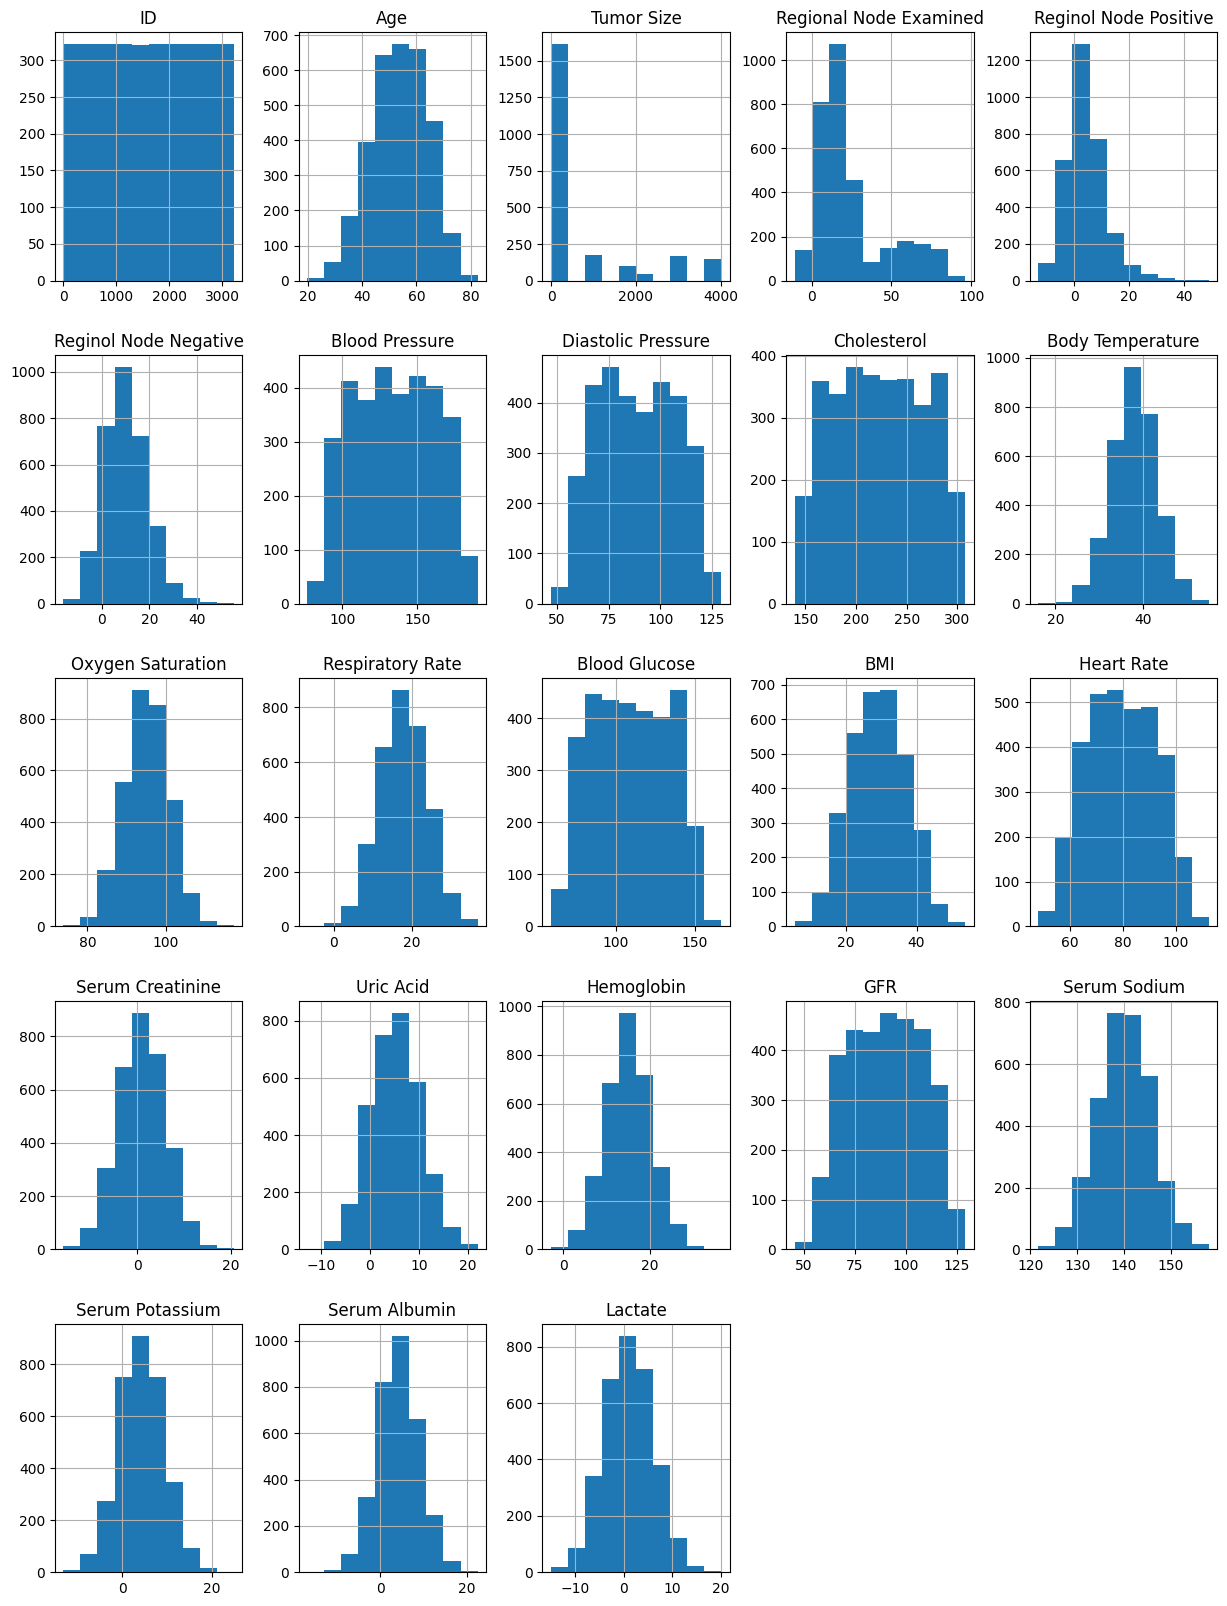

In [4]:
train_df.hist(figsize=(15, 20)) 

The numerical data distribution does not show any significant skew or heavy tails, indicating a relatively uniform spread.

# Data related tasks

## Subtask 1

In [5]:
GFR_cat = (test_df['GFR'] >= 90).map({True:'Normal', False:'Mildly Decreased'})

## Subtask 2

In [6]:
train_quartiles = train_df['Serum Creatinine'].quantile([0.25, 0.5, 0.75])
train_quartiles

s2_bins = [-1e10, train_quartiles[0.25], train_quartiles[0.5], train_quartiles[0.75], 1e10]
s2_labels = ['Very Low', 'Low', 'High', 'Very High']

risk_level = pd.cut(test_df['Serum Creatinine'], bins=s2_bins, labels=s2_labels)

## Subtask 3

In [7]:
train_median_BMI = train_df['BMI'].median()

BMI_status = (test_df['BMI'] > train_median_BMI).map({True:1, False:0})

## Subtask 4

In [8]:
T_vals = train_df['T Stage'].value_counts()
patient_similar_T  = test_df['T Stage'].map(T_vals)
patient_similar_T

0      1281
1      1281
2      1430
3       418
4      1281
       ... 
800    1281
801    1430
802    1430
803    1281
804    1281
Name: T Stage, Length: 805, dtype: int64

# Helper function for retrieving column labels with a dynamic approach to sorting by data types

In [9]:
def identify_attributes_labels(df):
    """
    Identifies and returns various attributes of the given DataFrame.
    
    This function returns:
    - All numerical features in the DataFrame.
    - Numerical features that contain NaN values.
    - All categorical features in the DataFrame.
    - Categorical features that contain NaN values.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame from which features will be identified.

    Returns:
    -------
    tuple : 
        - numerical_columns (pandas.Index): All numerical feature columns.
        - numerical_nan_columns (pandas.Index): Numerical features with NaN values.
        - categorical_columns (pandas.Index): All categorical feature columns.
        - categorical_nan_columns (pandas.Index): Categorical features with NaN values.
    """
    numerical_features = df.select_dtypes(include=['float', 'int'])
    
    numerical_features_with_nan_labels = numerical_features.columns[numerical_features.isna().any()]
    
    cat_features = df.select_dtypes(exclude=['float', 'int'])
    
    cat_features_with_nan_labels = cat_features.columns[cat_features.isna().any()]

    return numerical_features.columns, numerical_features_with_nan_labels, cat_features.columns, cat_features_with_nan_labels

In [10]:
num_atr_cols, num_nan_cols, cat_atr_cols, cat_nan_cols = identify_attributes_labels(train_X)

# ML Architecture:

### Building My Preprocessing Pipeline

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

def create_preprocessor(num_atr_cols, cat_atr_cols, scale=False):
    num_steps = [('imputer', SimpleImputer(strategy='median'))]
    
    if scale:
        num_steps.append(('scaler', StandardScaler()))
    
    num_pipeline = Pipeline(num_steps)
    
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value="Missing")),
        ('HotEncode', OneHotEncoder(handle_unknown='ignore'))
        
    ])
    
    preprocessor = ColumnTransformer([
        ('num', num_pipeline, num_atr_cols),
        ('cat', cat_pipeline, cat_atr_cols)
    ])

    return preprocessor

### Preparations

In [12]:
# Dropping irrelevant or redundant features before creating pipeline instances
num_drop = ['ID']
cat_drop = ['Marital Status', 'Race', 'T_N_Stage', 'Hormone_Status', 'differentiate', 'A State', "6th Stage"]
# Dropping '6th Stage' was crucial for achieving the maximum score

# Remove dropped features from the attribute columns
num_atr_cols = num_atr_cols.difference(num_drop)
cat_atr_cols = cat_atr_cols.difference(cat_drop)

# Comparing two models: RandomForestClassifier and LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize the models
LR_model = LogisticRegression(random_state = 42)
RFC_model = RandomForestClassifier(random_state = 42) # Initial RandomForest model

# Optionally, the following RFC model can be used with fine-tuned hyperparameters
# RFC_model = RandomForestClassifier(random_state = 42, n_estimators=200, max_features='log2', criterion='entropy') # this is the model with fine-tuning hyperparams

# Preprocessing for each model (can standardize data for both)
RFC_preprocessor = create_preprocessor(num_atr_cols, cat_atr_cols)
RFC_preprocessor.fit(train_X)
RFC_transformed = RFC_preprocessor.transform(train_X)

LR_preprocessor = create_preprocessor(num_atr_cols, cat_atr_cols, scale=True)
LR_preprocessor.fit(train_X)
LR_transformed = LR_preprocessor.transform(train_X)

# Extract new column names for categorical features
cat_encoder = LR_preprocessor.named_transformers_['cat'].named_steps['HotEncode']
cat_labels = cat_encoder.get_feature_names_out(cat_atr_cols)
all_labels = list(num_atr_cols) + list(cat_labels)

# Formatting transformed data as pandas DataFrames
RFC_transformed_df = pd.DataFrame(RFC_transformed, columns=all_labels)
LR_transformed_df = pd.DataFrame(LR_transformed, columns=all_labels)

### Training

In [13]:
# I will split my data for validation
from sklearn.model_selection import train_test_split

LR_X_train, LR_X_val, LR_y_train, LR_y_val = train_test_split(LR_transformed_df, train_y, test_size= 0.2, random_state=42)
RFC_X_train, RFC_X_val, RFC_y_train, RFC_y_val = train_test_split(RFC_transformed_df, train_y, test_size= 0.2, random_state=42)

# Time to train the models
RFC_model.fit(RFC_X_train, RFC_y_train)
LR_model.fit(LR_X_train, LR_y_train)

LogisticRegression(random_state=42)

### Evaluating performance

In [14]:
RFC_pred = RFC_model.predict(RFC_X_val)
LR_pred = LR_model.predict(LR_X_val)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, classification_report

print("Accuracy")
print("RFC score: ", accuracy_score(RFC_y_val, RFC_pred))
print("LR score: ", accuracy_score(LR_y_val, LR_pred))

print('\nPrecision')
print("RFC score: ", precision_score(RFC_y_val, RFC_pred, pos_label='Dead'))
print("LR score: ", precision_score(LR_y_val, LR_pred,  pos_label='Dead'))

# different approach
RFC_report = classification_report(RFC_y_val, RFC_pred)
LR_report = classification_report(LR_y_val, LR_pred) 

print('\nRFC Report: \n', RFC_report)
print('LR Report: \n',LR_report)

Accuracy
RFC score:  0.8540372670807453
LR score:  0.8493788819875776

Precision
RFC score:  0.4
LR score:  0.38095238095238093

RFC Report: 
               precision    recall  f1-score   support

       Alive       0.86      0.99      0.92       552
        Dead       0.40      0.04      0.08        92

    accuracy                           0.85       644
   macro avg       0.63      0.52      0.50       644
weighted avg       0.80      0.85      0.80       644

LR Report: 
               precision    recall  f1-score   support

       Alive       0.87      0.98      0.92       552
        Dead       0.38      0.09      0.14        92

    accuracy                           0.85       644
   macro avg       0.62      0.53      0.53       644
weighted avg       0.80      0.85      0.81       644



The Random Forest model seems to achieve higher precision for the 'Dead' class, indicating better performance in that category.

### Cross-Validation for Evaluating 'Dead' Class Precision

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

precision_scorer = make_scorer(precision_score, pos_label='Dead', zero_division=0)

RFC_scores = cross_val_score(RFC_model, RFC_X_train, RFC_y_train, scoring=precision_scorer, cv=10)
LR_scores = cross_val_score(LR_model, LR_X_train, LR_y_train, scoring=precision_scorer, cv=10)

print('Mean precision score:')
print('RFC ->', RFC_scores.mean())
print('LR ->', LR_scores.mean())

Mean precision score:
RFC -> 0.7566666666666666
LR -> 0.5472637085137085


The models maintained their performance hierarchy throughout the evaluation.

## Analyzing Feature Importances (We Have Quite a Few!)

In [17]:
sorted(zip(RFC_model.feature_importances_, RFC_X_train.columns), reverse=True)

[(np.float64(0.05410551141995418), 'Reginol Node Positive'),
 (np.float64(0.051647546453089624), 'Reginol Node Negative'),
 (np.float64(0.04421694180740985), 'Age'),
 (np.float64(0.04108890596551558), 'Serum Albumin'),
 (np.float64(0.03991215271112407), 'Serum Creatinine'),
 (np.float64(0.03962942237691588), 'Serum Potassium'),
 (np.float64(0.03946062845456283), 'Heart Rate'),
 (np.float64(0.039296927971281724), 'GFR'),
 (np.float64(0.039166740305994215), 'Regional Node Examined'),
 (np.float64(0.038959459757877686), 'Respiratory Rate'),
 (np.float64(0.038952826519830626), 'Serum Sodium'),
 (np.float64(0.03880854881115373), 'Oxygen Saturation'),
 (np.float64(0.038426744810061315), 'Blood Pressure'),
 (np.float64(0.03782046438989985), 'Uric Acid'),
 (np.float64(0.037514401599875534), 'Body Temperature'),
 (np.float64(0.037308643374833174), 'Lactate'),
 (np.float64(0.03719430475798119), 'Hemoglobin'),
 (np.float64(0.037123440557030055), 'Blood Glucose'),
 (np.float64(0.03712243633140692)

In [18]:
sorted(zip((LR_model.coef_[0]), LR_X_train.columns), reverse=True)

[(np.float64(0.5406568788199454), 'T Stage_T4'),
 (np.float64(0.38330668853347544), 'Grade_ anaplastic; Grade IV'),
 (np.float64(0.28006805387287864), 'Grade_3'),
 (np.float64(0.27154117995167226), 'N Stage_N3'),
 (np.float64(0.2586557654694963), 'Estrogen Status_Negative'),
 (np.float64(0.24908638212763812), 'Age'),
 (np.float64(0.1786092164363141), 'Reginol Node Positive'),
 (np.float64(0.16251125867283533), 'Progesterone Status_Negative'),
 (np.float64(0.08322510883097671), 'Serum Creatinine'),
 (np.float64(0.06592125036211617), 'Heart Rate'),
 (np.float64(0.04465856896442993), 'Tumor Size'),
 (np.float64(0.04326028082497431), 'N Stage_N2'),
 (np.float64(0.04162345527879089), 'T Stage_T3'),
 (np.float64(0.04001121249739235), 'Respiratory Rate'),
 (np.float64(0.037672061598001794), 'Regional Node Examined'),
 (np.float64(0.032999064843248486), 'Serum Sodium'),
 (np.float64(0.024388940638687826), 'Oxygen Saturation'),
 (np.float64(0.022882524434983894), 'Blood Glucose'),
 (np.float64(

After experimenting with fewer features by dropping those that seemed unimportant, I observed significant change in performance. The features I removed included 'Tumor Size', 'Blood Pressure', 'Cholesterol', 'Race', 'differentiate', and 'Grade' (based on the values from the above analysis). One feature that particularly surprised me was '6th Stage', which made the difference from 88% precision to 100%.

## Fine-Tuning with random search

In [19]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators':[100, 200, 300, 400],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss']
}

num_iter = 10

RFC_rand_search = RandomizedSearchCV(
    RFC_model, 
    param_distributions=param_dist,
    scoring=precision_scorer, 
    cv=4, 
    n_jobs=-1,
    n_iter=num_iter, 
    random_state=42)

RFC_rand_search.fit(RFC_X_train, RFC_y_train)

RandomizedSearchCV(cv=4,
                   estimator=RandomForestClassifier(criterion='entropy',
                                                    max_features='log2',
                                                    n_estimators=200,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42,
                   scoring=make_scorer(precision_score, response_method='predict', pos_label=Dead, zero_division=0))

In [20]:
print(RFC_rand_search.best_params_)
RFC_rand_search.best_score_

{'n_estimators': 200, 'max_features': 'log2', 'criterion': 'entropy'}


np.float64(0.798611111111111)

In [21]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga', 'lbfgs', 'newton-cg'],
    'max_iter': [10, 20, 50, 100, 200]
}

num_iter = 10

LR_random_search = RandomizedSearchCV(
    estimator=LR_model,
    scoring=precision_scorer,
    param_distributions=param_dist,
    n_iter=num_iter,
    cv=5,
    n_jobs=-1,
    random_state=42
)

LR_random_search.fit(LR_X_train, LR_y_train)

C:\Users\gurau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gurau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gurau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gurau\AppData

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_iter': [10, 20, 50, 100, 200],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['liblinear', 'saga', 'lbfgs',
                                                   'newton-cg']},
                   random_state=42,
                   scoring=make_scorer(precision_score, response_method='predict', pos_label=Dead, zero_division=0))

In [22]:
print(LR_random_search.best_params_)
LR_random_search.best_score_

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 200}


np.float64(0.6005179615705931)

## Conclusions: 

Fine-Tuning improved precision.
I will pick the Random Forest Classifier model since it looks to perform better according to the scores i've computed 

# Subtask 5

In [23]:
X = pd.DataFrame(RFC_preprocessor.transform(test_df), columns=all_labels)
predictions = RFC_model.predict(X)

# Now i will format the result as the problem expects a specific output

In [24]:
aux_df = pd.DataFrame()

aux_df['ID'] = test_df['ID']
aux_df['Task1'] = GFR_cat
aux_df['Task2'] = risk_level
aux_df['Task3'] = BMI_status
aux_df['Task4'] = patient_similar_T
aux_df['Task5'] = predictions

aux_df

,ID,Task1,Task2,Task3,Task4,Task5
0,3220,Normal,High,0,1281,Alive
1,3221,Normal,High,1,1281,Alive
2,3222,Normal,Low,0,1430,Alive
3,3223,Mildly Decreased,High,1,418,Alive
4,3224,Mildly Decreased,Low,1,1281,Alive
...,...,...,...,...,...,...
800,4020,Normal,High,1,1281,Alive
801,4021,Normal,High,0,1430,Alive
802,4022,Normal,High,1,1430,Alive
803,4023,Mildly Decreased,Low,0,1281,Alive


In [25]:
result = []

for _, row in aux_df.iterrows():
    for subtask_id in range(1, 6):
        result.append({
            'subtaskID': subtask_id,  # ID-ul subtask-ului
            'datapointID': row['ID'],  # ID-ul datapoint-ului din rândul curent
            'answer': row[f'Task{subtask_id}']  # Răspunsul pentru subtask-ul curent
        })

df_output = pd.DataFrame(result)

In [26]:
df_output.to_csv('Submission.csv', index=False)

# Final thoughts:

This project has provided valuable insights into the process of building and refining machine learning models. By experimenting with feature selection, data preprocessing, and evaluating model performance using cross-validation, I was able to identify which features had the most impact on the outcome. The surprising influence of the '6th Stage' feature, for example, was a key discovery that led to a significant improvement in precision, demonstrating the importance of thorough data exploration.

Through this project, I gained a deeper understanding of how even small adjustments—such as dropping or adding specific features—can drastically affect model performance. The comparison between models, especially Random Forest and Logistic Regression, further highlighted the importance of choosing the right model for the task at hand.

While the final model shows strong performance, there are still opportunities for further improvement, such as other encoding methods, experimenting with more advanced algorithms, or incorporating additional data sources. This process also emphasized the importance of continuous iteration and validation to ensure the model is robust and generalizable.

Overall, this project has not only strengthened my machine learning skills but also reinforced the value of a systematic, data-driven approach to model development.